Prepare a model for glass classification using Random Forest

Data Description:
- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps


### Import Necessary Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

### 1.Import/Read Data

In [12]:
glass_df = pd.read_excel('glass.xlsx',sheet_name=1)

### 2. Exploratory Data Analysis (EDA):

In [13]:
glass_df.shape

(214, 10)

In [14]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
glass_df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [17]:
glass_df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
##there are no missing values in the dataset

In [19]:
numerical_col = glass_df.select_dtypes(np.number).columns

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

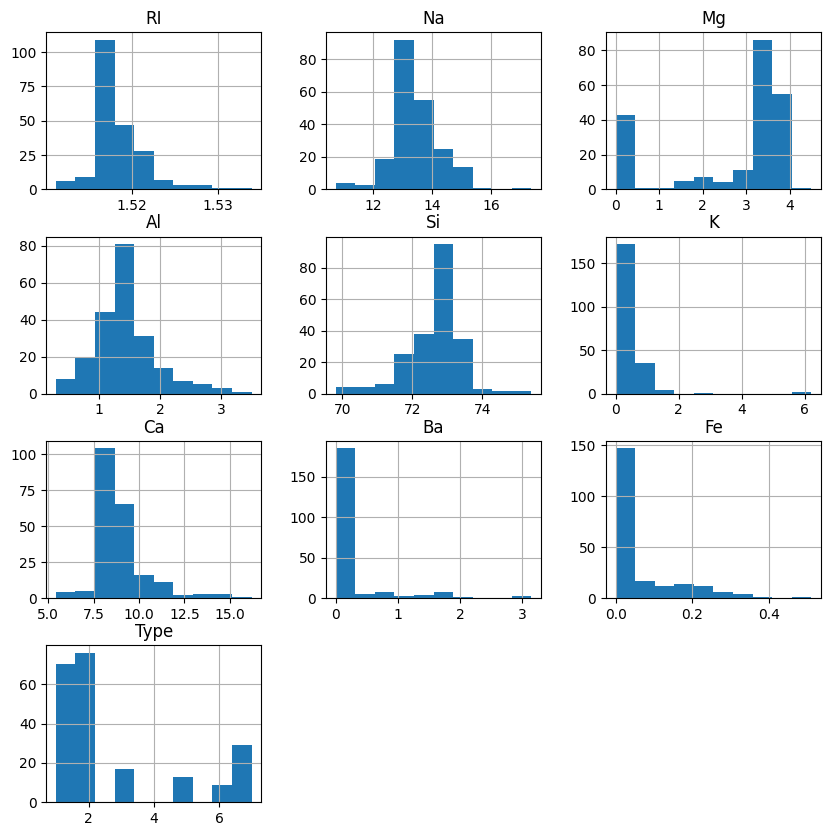

In [21]:
glass_df[numerical_col].hist(figsize=(10,10))

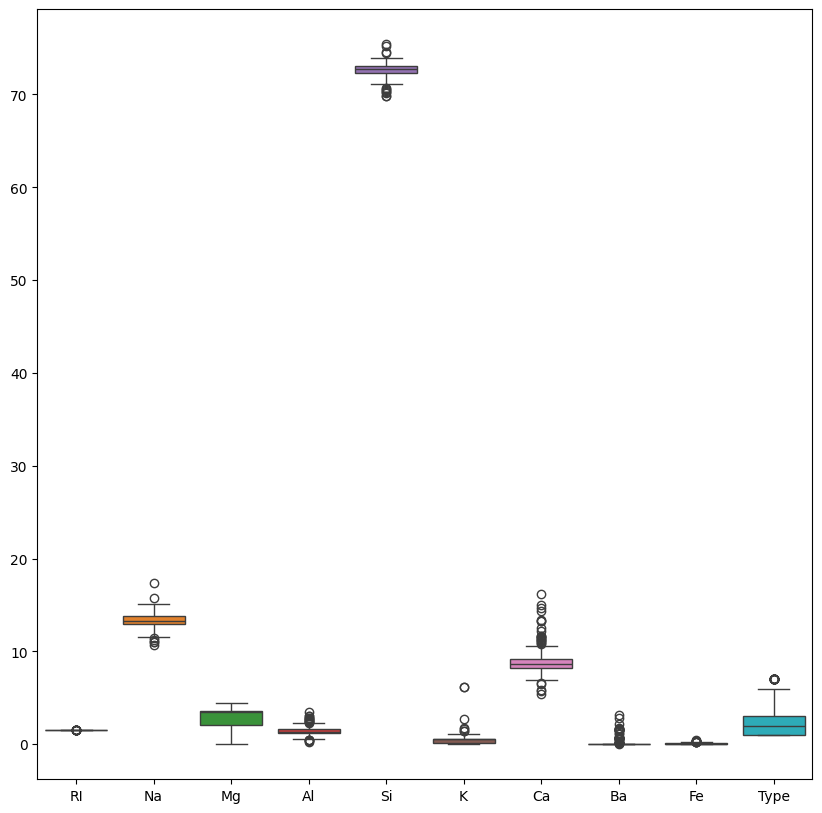

In [29]:
### check for outlires in the dataset
plt.figure(figsize=(10,10))
sns.boxplot(glass_df,orient='v')
plt.show()

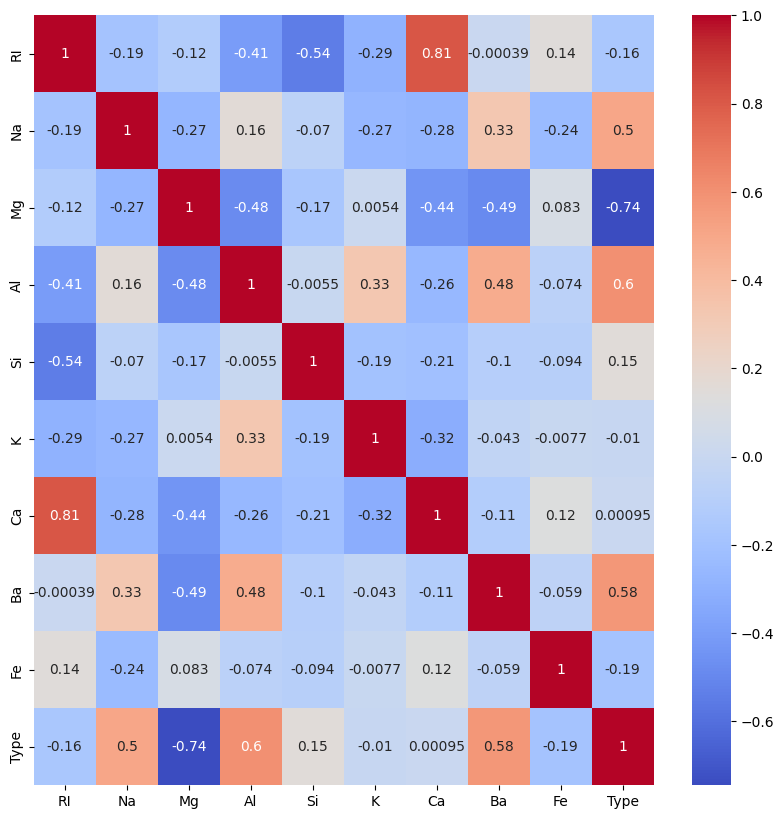

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(glass_df.select_dtypes(np.number).corr(),annot=True,cmap='coolwarm')
plt.show()

### 3. Data Preprocessing

### 4: Random Forest Model Implementation

In [49]:
## store dependenant and independenant variables
x = glass_df.drop('Type',axis=1)
y = glass_df['Type']

In [50]:
## split data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=35)

In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [54]:
rf_model = RandomForestClassifier(n_estimators=150,max_depth=3,random_state=42,criterion='entropy',n_jobs=-1)

In [55]:
rf_model.fit(x_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [56]:
y_pred = rf_model.predict(x_test_scaled)

In [57]:
accuracy_score(y_test,y_pred)

0.6744186046511628

In [60]:
confusion_matrix(y_test,y_pred)

array([[12,  3,  0,  0,  0,  0],
       [ 5, 12,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  0,  0,  3]])

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.80      0.69        15
           2       0.71      0.71      0.71        17
           3       0.00      0.00      0.00         2
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       1.00      0.75      0.86         4

    accuracy                           0.67        43
   macro avg       0.63      0.51      0.55        43
weighted avg       0.66      0.67      0.66        43



s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
## apply hyperparameter tuning
param_grid = {
    "n_estimators":[100,150,200,250,300],
    "criterion":["gini","entropy"],
    "max_depth":range(2,6),
    "max_leaf_nodes":range(5)
}

In [67]:
grid_cv = GridSearchCV(rf_model,param_grid,cv=5,scoring='accuracy')

In [68]:
grid_cv.fit(x_train_scaled,y_train)

s:\DataScience\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
400 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "s:\DataScience\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_par

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=3,
                                              n_estimators=150, n_jobs=-1,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'max_leaf_nodes': range(0, 5),
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [69]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'n_estimators': 150}

In [70]:
grid_cv.best_score_

np.float64(0.6788235294117647)

In [72]:
y_pred = grid_cv.predict(x_test)

s:\DataScience\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.42      1.00      0.60        17
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.47        43
   macro avg       0.24      0.29      0.24        43
weighted avg       0.26      0.47      0.32        43



s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
adb_model = AdaBoostClassifier(learning_rate=0.2)
gb_model = GradientBoostingClassifier(learning_rate=0.1)

In [78]:
rf_model.fit(x_train,y_train)
adb_model.fit(x_train,y_train)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
y_pred = rf_model.predict(x_test)

In [89]:
print("RF_Model Classification Report: \n",classification_report(y_test,y_pred))

RF_Model Classification Report: 
               precision    recall  f1-score   support

           1       0.57      0.80      0.67        15
           2       0.73      0.65      0.69        17
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.70        43
   macro avg       0.72      0.64      0.67        43
weighted avg       0.70      0.70      0.69        43



s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
y_pred = adb_model.predict(x_test)
print("RAdaboost Model Classification Report: \n",classification_report(y_test,y_pred))

RAdaboost Model Classification Report: 
               precision    recall  f1-score   support

           1       0.45      1.00      0.62        15
           2       1.00      0.06      0.11        17
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.33      0.75      0.46         4

    accuracy                           0.44        43
   macro avg       0.30      0.30      0.20        43
weighted avg       0.58      0.44      0.30        43



s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
s:\DataScience\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
y_pred = gb_model.predict(x_test)
print("Gradient Boosting Model Classification Report: \n",classification_report(y_test,y_pred))

Gradient Boosting Model Classification Report: 
               precision    recall  f1-score   support

           1       0.71      0.80      0.75        15
           2       0.83      0.88      0.86        17
           3       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.71        43
weighted avg       0.78      0.79      0.78        43



In Gradient boosting, we achieved the highest accuracy of 79%.